# Flight Price Prediction ✈ 


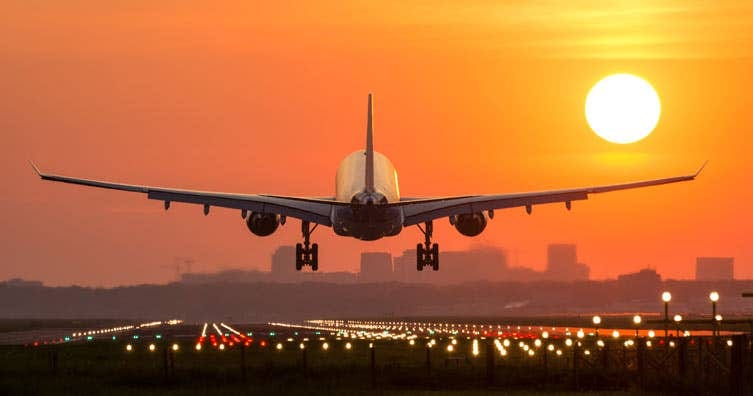

In [1]:

from IPython.display import Image
Image(filename='E:\\0_FD4uRgb02vYJROhz.jpg',width=400,height=400)


In [2]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing dataset
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()  #info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()  #describe about the data

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


** only price column descriptice statisics we are getting because that is only the int/float column we have

In [6]:
df.shape

(10683, 11)

In [7]:
#finding the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

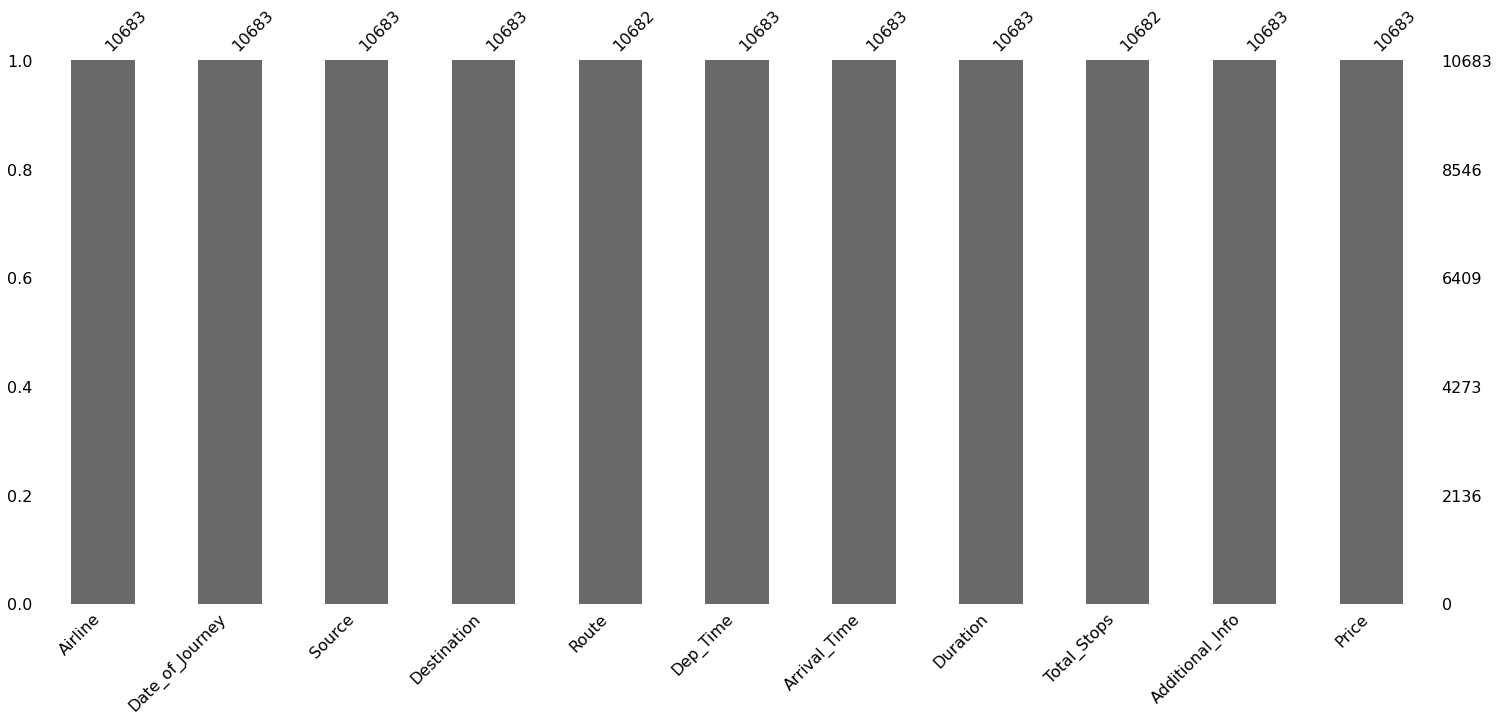

In [8]:
# we can also see null value count by plotting graph
import missingno as msno
msno.bar(df)

** We observe only 2 missing values in each 2 column,I can directly drop these as these are very less

In [9]:
# drop the nullvalues
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

- ## Data Cleaning

In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The datatypes of Date_of_Journey,Dep_Time,Arrival_Time is object. So,firstly we convert it into date and time format for prediction purpose and to fit the model later.

dt.day method will extract only day of that date

dt.month method will extract only month of that date

In [12]:
def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [13]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
for i in ['Arrival_Time', 'Date_of_Journey','Dep_Time']:
    change_into_datetime(i)

In [15]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-22 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897


In [16]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Now ,we extract day and month from Date_of_journey and stored in 2 other columns

After that we will drop Date_of_journey because of no use

In [17]:
df['journey_day'] = df['Date_of_Journey'].dt.day
df['journey_month'] =df['Date_of_Journey'].dt.month

In [18]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-22 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-22 05:50:00,2023-03-22 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-03-22 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-03-22 18:05:00,2023-03-22 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-03-22 16:50:00,2023-03-22 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2023-03-22 09:00:00,2023-03-22 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2023-03-22 18:55:00,2023-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2023-03-22 08:00:00,2023-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2023-03-22 08:55:00,2023-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2023-03-22 11:25:00,2023-03-22 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [19]:
df.drop('Date_of_Journey',axis=1,inplace=True)

From Arrival_time and Dept_time features,we extract hour and minutes and stored in new column and drop these columns

In [20]:
#function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour'] = data[col].dt.hour
def extract_min(data,col):
    data[col+'_min'] = data[col].dt.minute
def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [21]:
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')
drop_col(df,'Dep_Time')

In [22]:
extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')
drop_col(df,'Arrival_Time')

In [23]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


- Lets apply pre-processing on duration column, separate Duration hours and minute from duration

In [24]:
duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: #check if duration only contain hour
            duration[i] = duration[i] + ' 0m' #adds 0 minute
        else:
            duration[i] = '0h ' + duration[i]
            

In [25]:
df['Duration'] = duration

In [26]:
df['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [27]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [28]:
df['dur_hour'] = df['Duration'].apply(hour)
df['dur_min'] = df['Duration'].apply(minutes)

In [29]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [30]:
drop_col(df,'Duration')

In [31]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [32]:
# now we can change the data types of dur_hour and dur_min

df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [33]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

- Finding the categorical value

In [34]:
column = [column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

- Finding the continuous values

In [35]:
continous_col = [column for column in df.columns if df[column].dtype!='object']
continous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

### Handling the categorical data

In [36]:
categorical = df[column]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [37]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

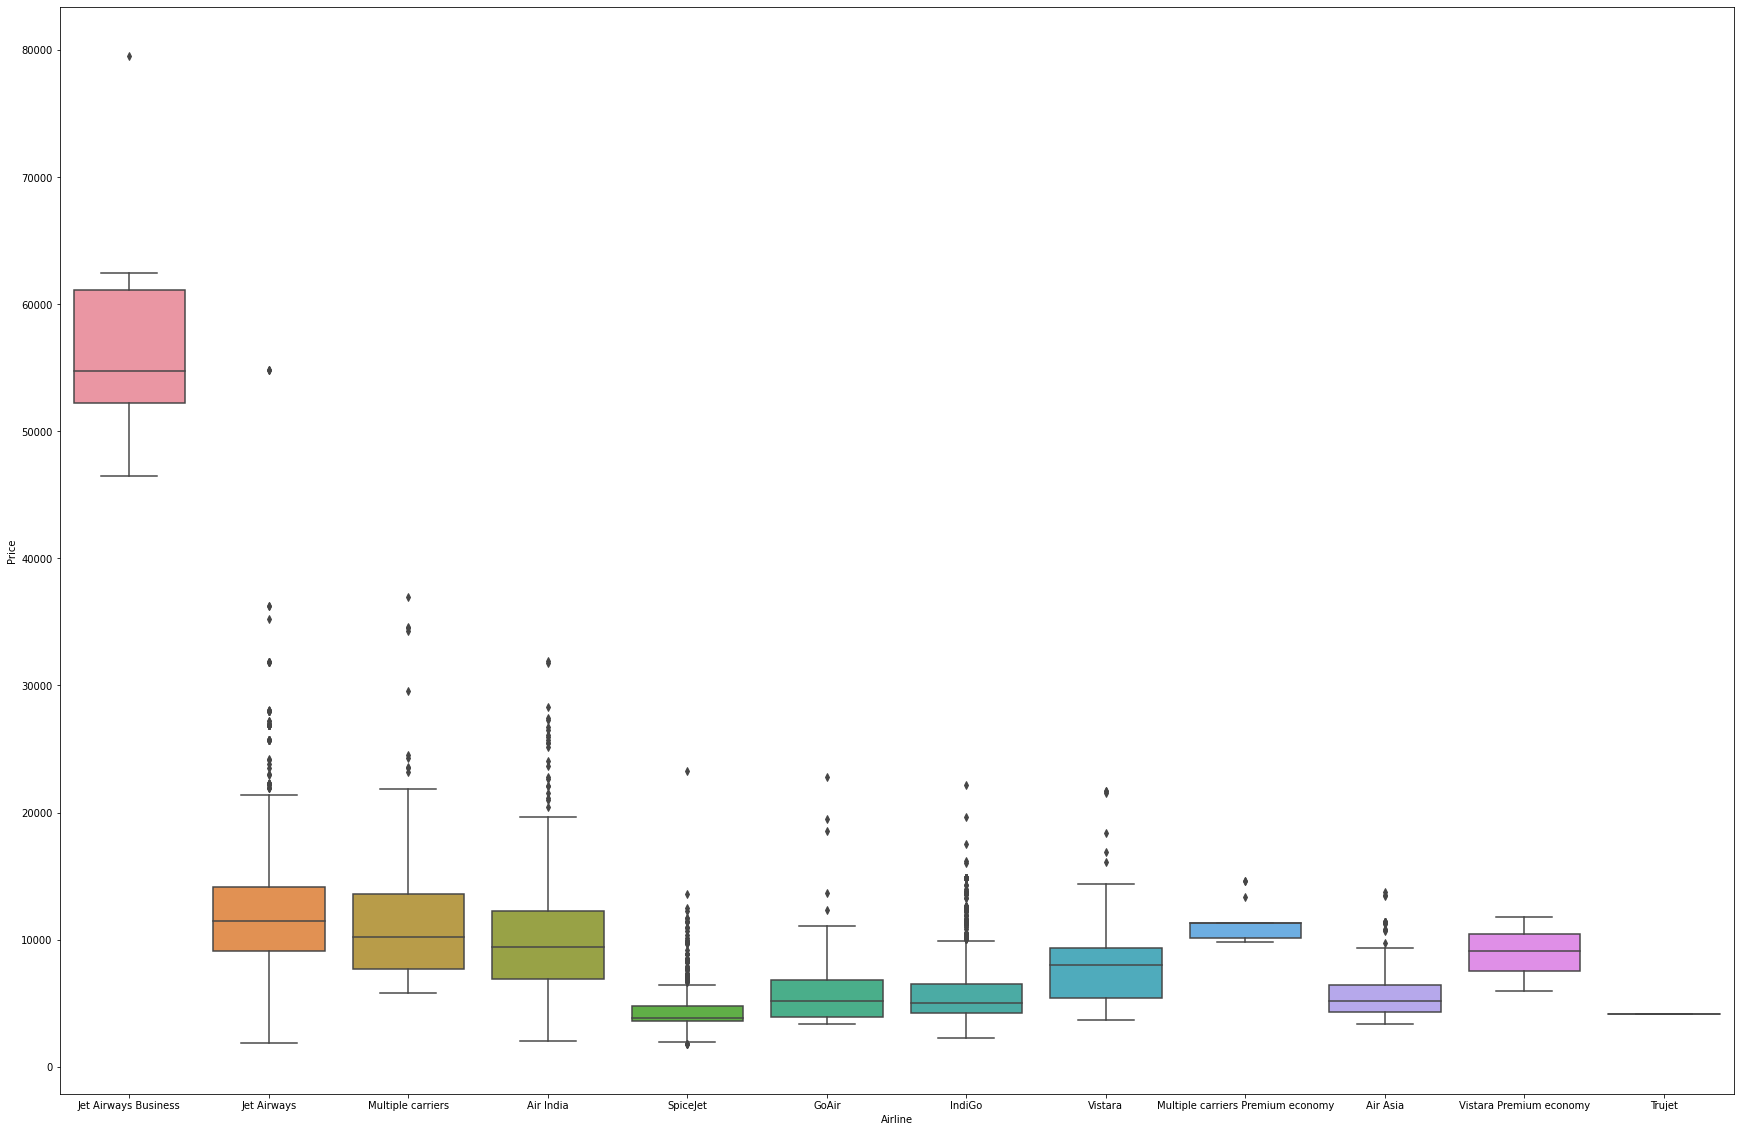

In [38]:
## Airline vs Price Analysis

plt.figure(figsize=(30,20))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

** So from the above observation we can conclude Jet Airways Business have highest Price..apart from first Airline almost all are having similar median

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

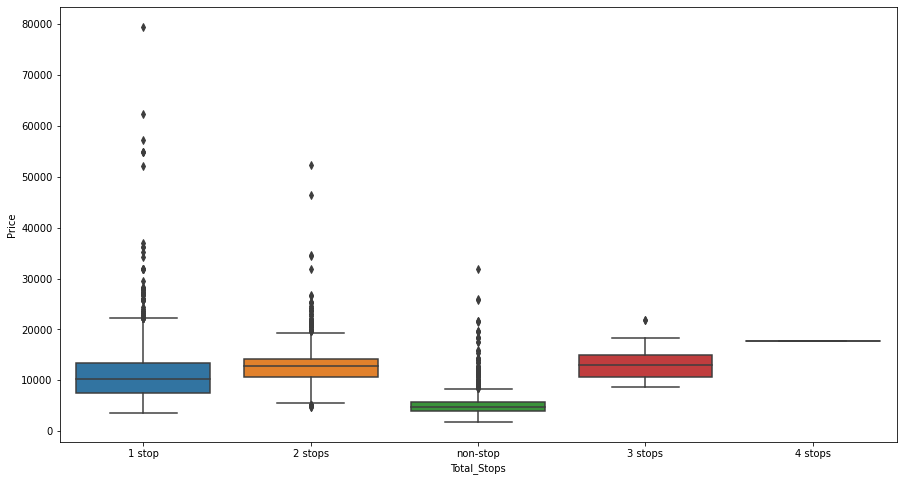

In [39]:
## Perform Total_Stops vs Price Analysis

plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [40]:
# As airline is nominal categorical data we will per form OnehotEncoding

Airline= pd.get_dummies(categorical['Airline'],drop_first=True)

In [41]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x1080 with 0 Axes>

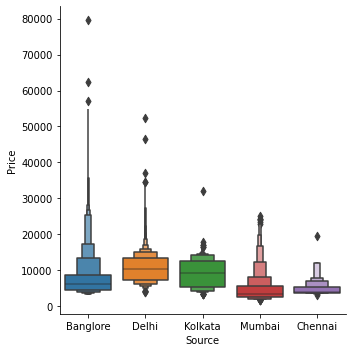

In [43]:
#Source vs Price

plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

In [44]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [45]:
#encoding of source column

source = pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [46]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

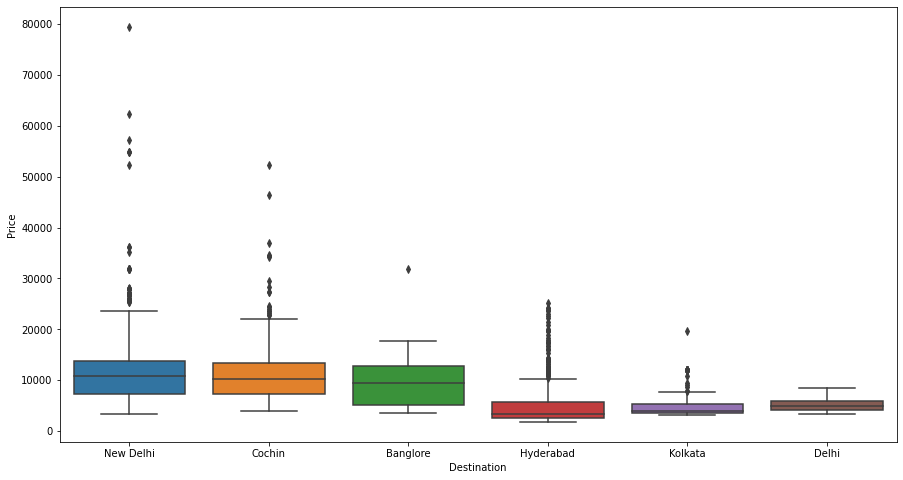

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [48]:
# encoding of destination column
destination = pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [49]:
# now we'll work on route coumn

categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [50]:
# now we will assign each city to distinct variable
# we will check max stops we have in our 'Total_stops'
c = 0
res = 0
for i in categorical['Total_Stops']:
    if i!= 'non-stop':
        max_stops = i.split(' ')[0]
        if int(max_stops) > c:
            c = int(max_stops)
            res = max_stops
print(res)

4


** So, maximum number of stops is -  4

In [51]:
categorical.loc[:,'Route1'] = categorical['Route'].str.split('\\u2192').str[0]
categorical.loc[:,'Route2'] = categorical['Route'].str.split('\\u2192').str[1]
categorical.loc[:,'Route3'] = categorical['Route'].str.split('\\u2192').str[2]
categorical.loc[:,'Route4'] = categorical['Route'].str.split('\\u2192').str[3]
categorical.loc[:,'Route5'] = categorical['Route'].str.split('\\u2192').str[4]



C:\python\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


While executing this code, I encountered a `SettingWithCopyWarning` error when trying to assign a new column 'Route1' to the 'categorical' DataFrame using a slice of the original DataFrame 'categorical['Route']' - so , stackflow categorical.loc[:,'Route5'] suggested this 

In [52]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [53]:
drop_col(categorical,'Route')

C:\python\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [56]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [57]:
for i in ['Route3','Route4','Route5']:
    categorical[i].fillna('None',inplace=True)

C:\python\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [58]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [59]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


<AxesSubplot:xlabel='Arrival_Time_hour', ylabel='Price'>

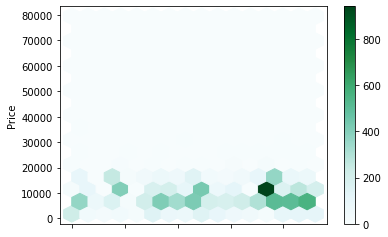

In [60]:
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [61]:
# Applyinh label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [62]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\91704\AppData\Local\Temp\ipykernel_12132\1864785191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [63]:
categorical.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5
5,SpiceJet,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
6,Jet Airways,Banglore,New Delhi,1 stop,In-flight meal not included,0,7,8,13,5
7,Jet Airways,Banglore,New Delhi,1 stop,No info,0,7,8,13,5
8,Jet Airways,Banglore,New Delhi,1 stop,In-flight meal not included,0,7,8,13,5
9,Multiple carriers,Delhi,Cochin,1 stop,No info,3,7,6,13,5


In [64]:
drop_col(categorical,'Additional_Info')

C:\python\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [66]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [67]:
#encoding Total stops
dict = {'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}

categorical['Total_Stops']= categorical['Total_Stops'].map(dict)

C:\Users\91704\AppData\Local\Temp\ipykernel_12132\1292035057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']= categorical['Total_Stops'].map(dict)


In [68]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [69]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

C:\python\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
#categorical

Our All Preprocessing, Our data is ready for the modeling

In [71]:
final_df = pd.concat([categorical,Airline,source])

In [72]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [73]:
final_df = pd.concat([categorical,Airline,source,
        destination,df[continous_col]],axis=1)

In [74]:
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


### Check Outliers

In [88]:
# def plot(data,col):
#     fig,(ax1,ax2) = plt.subplots(2,1)
#     sns.kdeplot(data=data,x=col,ax=ax1)
#     sns.boxplot(data[col],ax=ax2)

def plot(data, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.histplot(data=data,x=col, ax=ax1)
    sns.boxplot(data=data, x=col, ax=ax2)

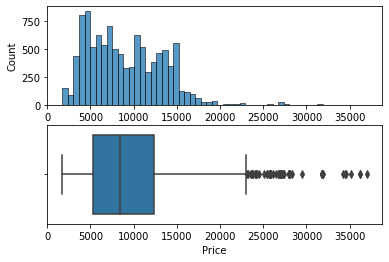

In [89]:
plot(final_df,'Price')

#### Handling Outliers

In [91]:
final_df['Price']= np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

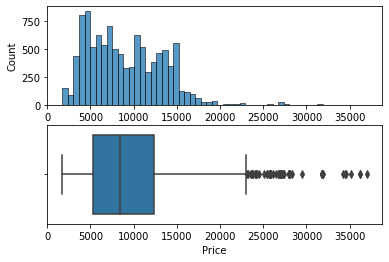

In [92]:
plot(final_df,'Price')

Seprate the dataset in X and Y columns

In [ ]:
x = final_df.drop('Price',axis=1)
y = df['Price']

In [93]:
final_df

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897.0,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662.0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882.0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218.0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302.0,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,...,0,4107.0,4,9,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,...,0,4145.0,27,4,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,...,0,7229.0,27,4,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,...,1,12648.0,3,1,11,30,14,10,2,40


In [ ]:
Feature Selection

It is about

In [ ]:
## Feature Engineering Process
final_df['Date'] = final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month'] = final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]

#or by using lambda function we can split 
#df['Date'] = df['Date_of_Journey'].apply(lambda x:x.split('/')[0])

In [ ]:
final_df.head()

In [ ]:
final_df['Date']=final_df['Date'].astype('int')
final_df['Month']=final_df['Month'].astype('int')
final_df['Year']=final_df['Date'].astype('int')

In [ ]:
final_df.info()

In [ ]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
final_df.head(1)

In [ ]:
# final_df['Arrival_Time'].str.split(' ').str[0]
# or
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [ ]:
final_df.isnull().sum()

In [ ]:
final_df['Arrival_hour'] = final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min'] = final_df['Arrival_Time'].str.split(':').str[1]

In [ ]:
final_df.head(1)

In [ ]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype('int')
final_df['Arrival_min']=final_df['Arrival_min'].astype('int')

In [ ]:
final_df.info()

In [ ]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
final_df.head(1)

In [ ]:
final_df['Dep_hour'] = final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_min'] = final_df['Dep_Time'].str.split(':').str[1]
final_df['Dep_hour'] = final_df['Dep_hour'].astype('int')
final_df['Dep_min'] = final_df['Dep_min'].astype('int')
final_df.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
final_df.info()

In [ ]:
final_df.head(1)

In [ ]:
final_df['Total_Stops'].unique()

In [ ]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [ ]:
final_df[final_df['Total_Stops'].isnull()]

In [ ]:
final_df.head()

In [ ]:
final_df.drop('Route',axis=1,inplace=True)

In [ ]:
final_df.head()

In [ ]:
final_df['Additional_Info'].unique()

In [ ]:
final_df['duration_hour']=final_df['Duration'].str.split(':').str[0].str.split('h').str[0]

In [ ]:
final_df[final_df['duration_hour']=='5m']

In [ ]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [ ]:
final_df.head()

In [ ]:
final_df['duration_hour'] = final_df['duration_hour'].astype('int')